# <font color='RedBlue'>**Sistema de Previsão de Doenças Renais**</font> $→$ *SPDR*

## <font color='BLUE'> **1° Problema de Negócio** </font>

- O trabalho é desenvolver um Sistema de Previsão de Doenças Renais para auxiliar os médicos na identificação das doenças crônicas dos rins.

 - *O primeiro objetivo é descobrir e entender quais são as variáveis consideradas mais importantes pelos Nefrologista para diagnosticar se um paciente possui ou não Doença Renal.*

  - Isto porque dentro das discussões de negócio de uma determinada empresa é comum serem listadas dezenas ou centenas de variáveis que podem impactar direta ou indiretamente nas tomadas de decisão sobre a ocorrência de Doenças Renais.


### Link dos dados

- https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease#

- Nome do arquivo: **Kidney_data.csv**

## <font color='BLUE'> **2° Análise Exploratória** </font>

- **Importando as Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignorando Alertas
import warnings
warnings.filterwarnings('ignore')

# Exibindo os gráfico nesse Notebook
%matplotlib inline

- **Carregando os Dados**

In [25]:
# Lendo os Dados
from datetime import datetime
print(datetime.now())
df = pd.read_csv('/content/Kidney_data.csv')
print(datetime.now())

2022-04-16 03:48:26.685792
2022-04-16 03:48:26.695381


In [3]:
# Verificar o tamanho da base de dados "(Linhas, Colunas)"
df.shape

(400, 26)

In [4]:
# Visualizando as 5 primeiras lindas da base de dados
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


- **Descrição das Variaveis**

![](https://cienciadosdados.com/images/2022/ad.png)

#### **Conhecendo os Dados**

In [5]:
# Verificando informações 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
# Verificando informações 
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [7]:
# Verificando se há valores Missing (valores ausentes)
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
# Verificando se há linhas duplicadas
df.duplicated().sum()

0

In [9]:
# Estatística Descritiva das Variáveis:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### *Analisando a variavel* <font color = 'Chocolate'> **classification**</font> $→$ **Variável Target** (*teve ou não doença nos rins*)

In [10]:
# Verificando a quantidade de elemento do Target
df.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

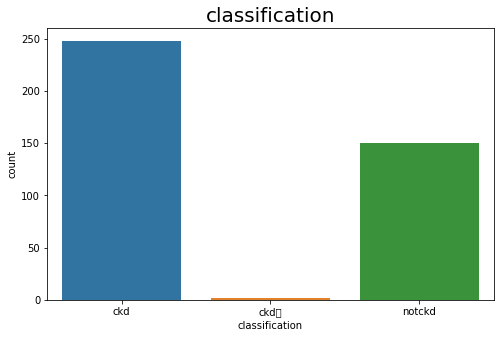

In [11]:
#  Gráfico de Barras 
plt.figure(figsize=(8,5))
sns.countplot(df.classification)
plt.title('classification', fontsize=20)
plt.show()

### *Analisando a variavel* <font color = 'Chocolate'> **rbc**</font> $→$ **Glóbulos Vermelhos**

In [12]:
# Verificando a quantidade de elemento do Target
df.rbc.value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

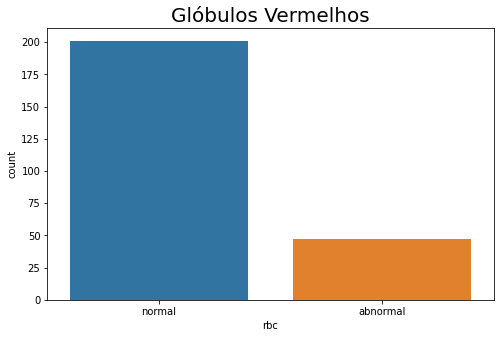

In [13]:
# Gráfico de Barras para variáveis Categóricas
# Gráfico de Barras 
plt.figure(figsize=(8,5))
sns.countplot(df.rbc)
plt.title('Glóbulos Vermelhos', fontsize=20)
plt.show()

### *Analisando a variavel* <font color = 'Chocolate'> **ba**</font> $→$ **Presença de Bactérias**

In [14]:
# Verificando a quantidade de elementos
df.ba.value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

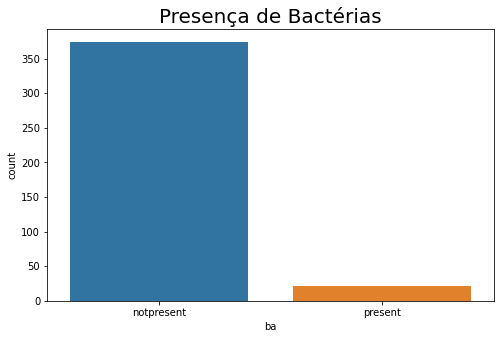

In [15]:
# Gráfico de Barras 
plt.figure(figsize=(8,5))
sns.countplot(df.ba)
plt.title('Presença de Bactérias', fontsize=20)
plt.show()

### *Analisando a variavel* <font color = 'Chocolate'> **pc**</font> $→$ **Células de pus**

In [16]:
# Verificando a quantidade de elementos
df.pc.value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

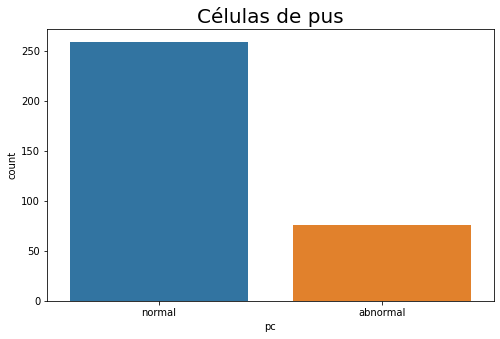

In [17]:
# Gráfico de Barras 
plt.figure(figsize=(8,5))
sns.countplot(df.pc)
plt.title('Células de pus', fontsize=20)
plt.show()

### *Analisando a variavel* <font color = 'Chocolate'> **age**</font> $→$ **Idade**

In [18]:
# Verificando a quantidade de elementos
df.age.value_counts()

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64

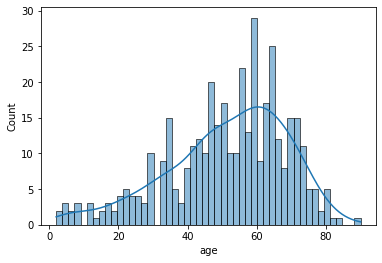

In [19]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(df['age'], bins=50, kde=True);

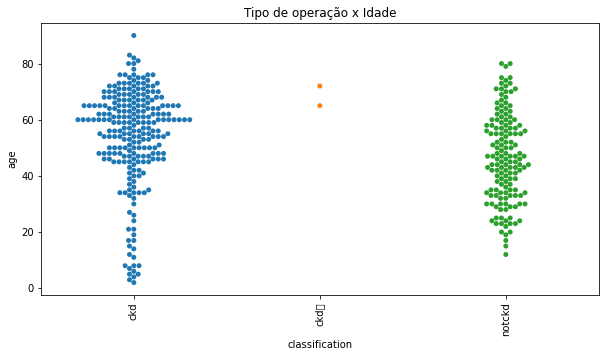

In [21]:
# Gráfico de Distribuição da idade
plt.figure(figsize = (10,5))
sns.swarmplot(x = "classification", y = "age",data = df)
plt.title("Tipo de operação x Idade")
plt.xticks(rotation=90)
plt.show();

# OUTRA FORMA ---->  sns.swarmplot(data=df, x='classification', y='age');

## <font color='BLUE'> **3° Pré-Processamento dos Dados** </font>

In [26]:
# Eliminando Variáveis desnecessárias
df = df.drop('id', axis=1)

 ### **Substituindo Valores categóricos** em números

- <font color = 'Purple'> **rbc**</font>

In [27]:
# Antes
df.rbc.value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [28]:
df['rbc'] = df['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

In [29]:
# Depois
df.rbc.value_counts()

0.0    201
1.0     47
Name: rbc, dtype: int64

- <font color = 'Purple'> **pc**</font>

In [30]:
# Antes
df.pc.value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [31]:
df['pc'] = df['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

In [32]:
# Depois
df.pc.value_counts()

0.0    259
1.0     76
Name: pc, dtype: int64

- <font color = 'Purple'> **pcc**</font>

In [33]:
# Antes
df.pcc.value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [34]:
df['pcc'] = df['pcc'].replace(to_replace = {'notpresent':0,'present':1})

In [35]:
# Depois
df.pcc.value_counts()

0.0    354
1.0     42
Name: pcc, dtype: int64

- <font color = 'Purple'> **ba**</font>

In [36]:
# Antes
df.ba.value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [37]:
df['ba'] = df['ba'].replace(to_replace = {'notpresent':0,'present':1})

In [38]:
# Depois
df.ba.value_counts()

0.0    374
1.0     22
Name: ba, dtype: int64

- <font color = 'Purple'> **htn**</font>

In [39]:
# Antes
df.htn.value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [40]:
df['htn'] = df['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [41]:
# Depois
df.htn.value_counts()

0.0    251
1.0    147
Name: htn, dtype: int64

- <font color = 'Purple'> **dm**</font>

In [42]:
# Antes
df.dm.value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [43]:
df['dm'] = df['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})

In [44]:
df['dm'] = df['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [45]:
# Depois
df.dm.value_counts()

0.0    261
1.0    137
Name: dm, dtype: int64

- <font color = 'Purple'> **cad**</font>

In [46]:
# Antes
df.cad.value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [47]:
df['cad'] = df['cad'].replace(to_replace = {'\tno':'no'})

In [48]:
df['cad'] = df['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [ ]:
# Depois
df.cad.value_counts()

0.0    364
1.0     34
Name: cad, dtype: int64

- <font color = 'Purple'> **appet**</font>

In [49]:
# Antes
df.appet.unique()

array(['good', 'poor', nan], dtype=object)

In [50]:
df['appet'] = df['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})

In [51]:
# Depois
df.appet.unique()

array([ 1.,  0., nan])

- <font color = 'Purple'> **pe**</font>

In [52]:
# Antes 
df.pe.value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [53]:
df['pe'] = df['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [54]:
# Depois
df.pe.value_counts()

0.0    323
1.0     76
Name: pe, dtype: int64

- <font color = 'Purple'> **ane**</font>

In [55]:
# Antes
df.ane.value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [56]:
df['ane'] = df['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [57]:
# Depois
df.ane.value_counts()

0.0    339
1.0     60
Name: ane, dtype: int64

- <font color = 'Purple'> **classification**</font>

In [58]:
# Antes
df.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [59]:
df['classification'] = df['classification'].replace(to_replace={'ckd\t':'ckd'})

In [60]:
df["classification"] = [1 if i == "ckd" else 0 for i in df["classification"]]

In [61]:
# Depois
df.classification.value_counts()

1    250
0    150
Name: classification, dtype: int64

In [62]:
# Verificando os dados
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [63]:
# Verificando o tipo das variáveis:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

### Convertento variáveis **"Object"**<font color = 'Tomato'> **numéricas**</font>



In [64]:
# Forçando uma conversão numérica, visto que os campos contem números
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [65]:
# Verificando o tipo das variáveis:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [66]:
# Estatística Descritiva das variáveis
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# Verificando os valores Missing (NaN) e ordena-los de forma decrescente
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [68]:
# Porcentagem de dados faltantes
for col in df.columns:
  perc=np.mean(df[col].isna())
  print(f'{col}:{round(perc*100)} %')

age:2 %
bp:3 %
sg:12 %
al:12 %
su:12 %
rbc:38 %
pc:16 %
pcc:1 %
ba:1 %
bgr:11 %
bu:5 %
sc:4 %
sod:22 %
pot:22 %
hemo:13 %
pcv:18 %
wc:26 %
rc:33 %
htn:0 %
dm:0 %
cad:0 %
appet:0 %
pe:0 %
ane:0 %
classification:0 %


### **Substituição ou eliminação de valores ausentes(missings)** $→$ <font color = 'Tomato'> **Imputação de valores**</font>

In [70]:
#Criando uma lista com o nome das Colunas para usar na substituição de missings)
lista = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

In [71]:
# Fazendo um Loop nas colunas com valor valor missing encontrado.
# Calcular a mediana de cada variável
# Substituir cada valor missing (NaN) pela mediana de cada uma das colunas. 
for e in lista:
    df[e] = df[e].fillna(df[e].median())

In [72]:
# Verificando se ainda temos valores ausentes
df.isnull().sum().sum()

0

### <font color = 'Tomato'> **Análise de Correlação**</font>

In [73]:
# Correlação
correlations = df.corr()
correlations

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.136316,-0.160374,0.085918,0.186750,0.014904,0.102286,0.157401,0.042427,0.230731,...,-0.212796,0.093794,-0.203199,0.395073,0.364306,0.231419,-0.156581,0.094772,0.052938,0.227842
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150384,0.156231,0.056808,0.110164,0.150180,...,-0.289237,0.022177,-0.219317,0.266901,0.226489,0.084135,-0.175054,0.056902,0.195134,0.293693
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.253894,-0.365353,-0.306426,-0.231704,-0.299413,...,0.496434,-0.195068,0.432222,-0.323643,-0.351016,-0.135814,0.230975,-0.253803,-0.184155,-0.659504
al,0.085918,0.123518,-0.479962,1.000000,0.287751,0.394844,0.561713,0.417868,0.377935,0.293150,...,-0.473446,0.202920,-0.405092,0.406057,0.308101,0.200957,-0.303145,0.411080,0.229556,0.531562
su,0.186750,0.189561,-0.292053,0.287751,1.000000,0.092940,0.190062,0.168091,0.119399,0.627002,...,-0.181285,0.156649,-0.161994,0.254268,0.430514,0.229301,-0.069216,0.116442,0.042464,0.294555
rbc,0.014904,0.150384,-0.253894,0.394844,0.092940,1.000000,0.377394,0.102948,0.184402,0.138615,...,-0.279875,-0.003471,-0.196534,0.140538,0.145646,0.111493,-0.160868,0.199285,0.107625,0.282642
pc,0.102286,0.156231,-0.365353,0.561713,0.190062,0.377394,1.000000,0.520118,0.330401,0.247665,...,-0.418435,0.106733,-0.381949,0.291719,0.201032,0.172295,-0.274985,0.350227,0.260566,0.375154
pcc,0.157401,0.056808,-0.306426,0.417868,0.168091,0.102948,0.520118,1.000000,0.275082,0.195223,...,-0.296580,0.163215,-0.263810,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
ba,0.042427,0.110164,-0.231704,0.377935,0.119399,0.184402,0.330401,0.275082,1.000000,0.079162,...,-0.189420,0.104748,-0.192212,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,0.138615,0.247665,0.195223,0.079162,1.000000,...,-0.258200,0.119881,-0.214094,0.367816,0.503254,0.207020,-0.177285,0.094806,0.112449,0.379321


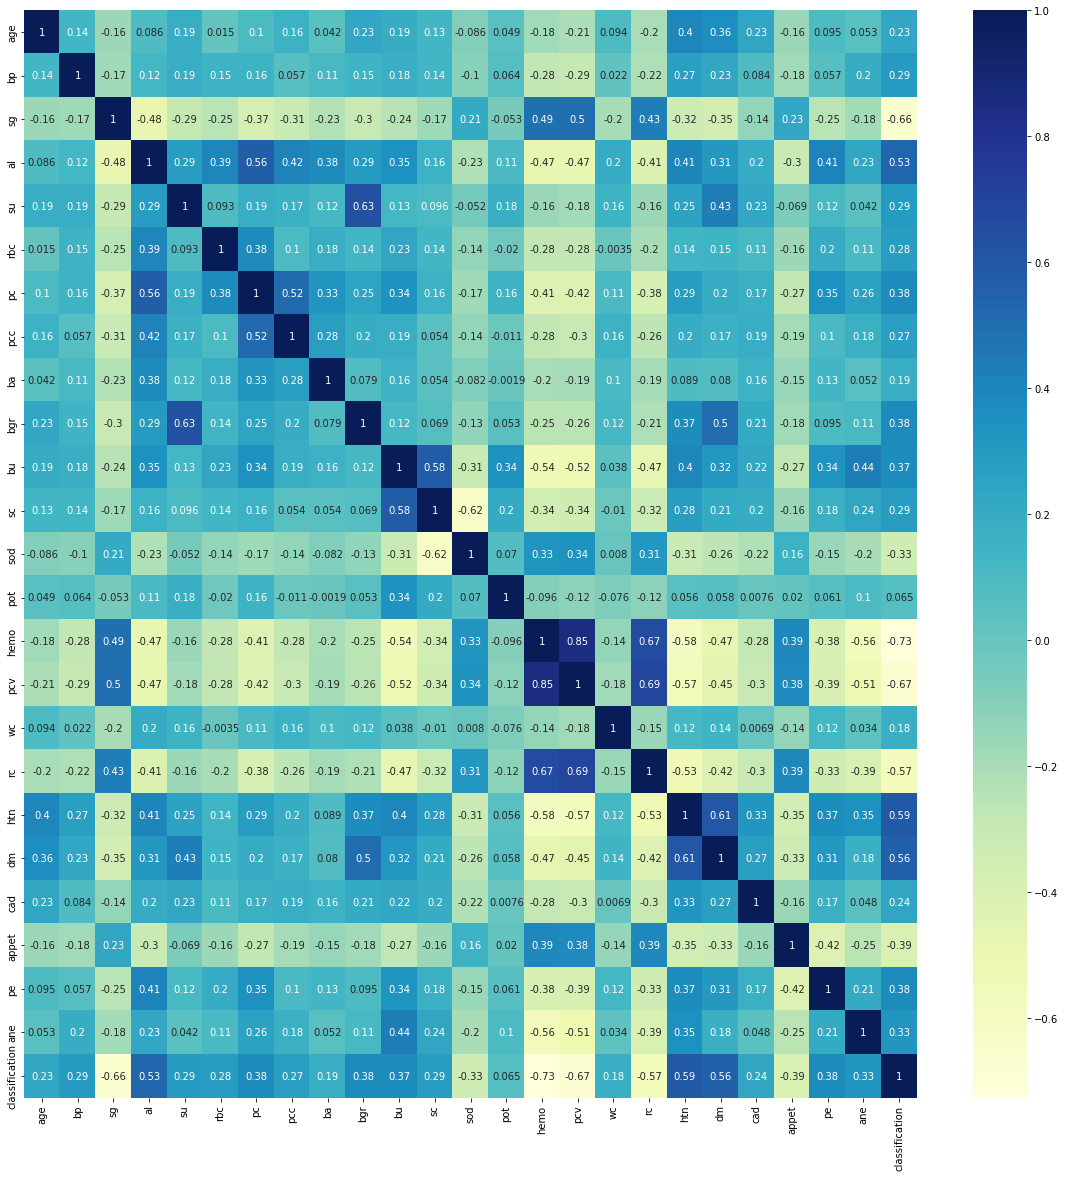

In [74]:
# Gráfico de correlação (Heatmap)
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True, cmap='YlGnBu');

 - Verificando quais variaveis são mais **Correlacionadas**

In [75]:
p = 0.75 # correlação mínima
var = []
for i in correlations.columns:
    for j in correlations.columns:
        if(i != j):
            if np.abs(correlations[i][j]) > p: # se for maior do que |p|
                var.append([i,j])
print('Variáveis mais correlacionadas:\n', var)

Variáveis mais correlacionadas:
 [['hemo', 'pcv'], ['pcv', 'hemo']]


- Percebemos claramente que a variável **pcv** e a variável **hemo** estão altamente correlacionadas (**$85$**%) e isso pode nos gerar um problema conehcido como **multicollinearity**.

 - Para resolver esse problema, vamos eliminar uma delas. Nesse caso, vamos eliminar a **pcv**

In [76]:
# Eliminando a variável 'pcv'
df.drop('pcv', axis=1, inplace=True)

In [77]:
# Visualizando os dados
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


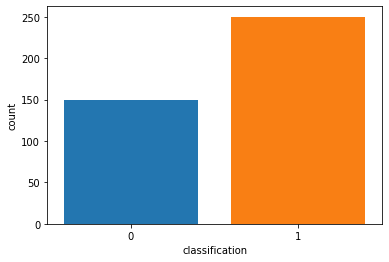

In [78]:
# Visualizando o Target
sns.countplot(df['classification'],saturation=0.95);

### **Separando as Variáveis** explicativas <font color = 'Tomato'> **(X)** </font> e o Target <font color = 'Tomato'> **(y)** </font> para treinamento do algoritmo na Máquina Preditiva

In [79]:
# Independent and Dependent Feature:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [80]:
# Visualizando o X
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,4.4,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,4.4,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,2.5,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
# Visualizando o y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

### **Descobrindo quais são as melhores variáveis ou as mais importantes**

In [82]:
# Verificando quais Features são as mais Importantes
from sklearn.ensemble import ExtraTreesClassifier

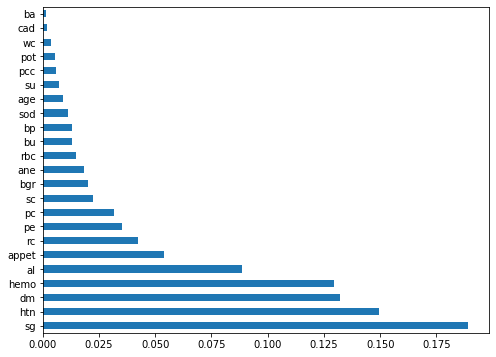

In [83]:
# Usando o ExtraTree  para nos mostrar as Variáveis mais Importantes
model=ExtraTreesClassifier()
model.fit(X,y)

# Gráfico
plt.figure(figsize=(8,6))
variaveis_importantes = pd.Series(model.feature_importances_,index=X.columns)
variaveis_importantes.nlargest(24).plot(kind='barh')
plt.show()

### **Separando as 8 melhores variáveis para a Máquina Preditiva**

In [84]:
#Função para ranquear as 8 mais importantes
variaveis_importantes.nlargest(8).index

Index(['sg', 'htn', 'dm', 'hemo', 'al', 'appet', 'rc', 'pe'], dtype='object')

In [85]:
# Separando as 8 variáveis mais importantes em "X_novo" para que o algoritmo treine com esses dados
X_novo = df[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
X_novo.head()

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,1.0,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,0.0,4.0,1.0,4.8,0.0
2,1.010,0.0,9.6,1.0,2.0,0.0,4.8,0.0
3,1.005,1.0,11.2,0.0,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,0.0,2.0,1.0,4.6,0.0


In [86]:
# Os 5 últimos registros
X_novo.tail()

,sg,htn,hemo,dm,al,appet,rc,pc
395,1.020,0.0,15.7,0.0,0.0,1.0,4.9,0.0
396,1.025,0.0,16.5,0.0,0.0,1.0,6.2,0.0
397,1.020,0.0,15.8,0.0,0.0,1.0,5.4,0.0
398,1.025,0.0,14.2,0.0,0.0,1.0,5.9,0.0
399,1.025,0.0,15.8,0.0,0.0,1.0,6.1,0.0


In [87]:
# Verificando o target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

### **Separando os dados em treino e teste**

In [88]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_novo,y, test_size=0.3, random_state=33)

In [89]:
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


## <font color='BLUE'> **4° Criação da Máquina Preditiva** </font>

###<font color = 'Goldenro'> **Modelo Baseline**</font> 

- O modelo **baseline** será construido somente com as 8 variáveis mais importantes.

### <font color = 'LightSal'> **RandomForest**</font>

In [90]:
# Importação
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
#Realizando o treinamento (fit) com os dados de treino

# Criando a máquina
modelo_1 = RandomForestClassifier()

# Treinando
modelo_1 = modelo_1.fit(X_train,y_train)

In [92]:
# Fazendo Previsões com dados de teste:
y_pred = modelo_1.predict(X_test)

###<font color = 'Choy'> **Melhorando o Baseline**</font> 

### <font color = 'LightSal'> **GradientBoosting**</font>

In [93]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
# Criando a máquina preditiva
modelo_2 = GradientBoostingClassifier(n_estimators=2000)

# Treinando
modelo_2 = modelo_2.fit(X_train,y_train)

In [95]:
# Fazendo Previsões com dados de teste
# Predictions:
y_pred_g = modelo_2.predict(X_test)

## <font color='BLUE'> **5° Avaliação da Máquina Preditiva** </font>

###**RandomForest**

In [96]:
# Avaliando a Performance comparando com o gabarito (y) de teste:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



### **GradientBoosting**

In [97]:
# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred_g))
print(classification_report(y_test,y_pred_g))

Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.98      0.99        62

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



###<font color = 'Goldenro'> **Salvamento da Máquina Preditiva**</font> $→$ **RandomForest**

In [98]:
# Creating a pickle file for the classifier
import pickle
filename = 'maquina_preditiva.pkl'
pickle.dump(modelo_2, open(filename, 'wb'))